### gradient descent intuition

* reference
    * http://blog.csdn.net/huahuazhu/article/details/73385362

In [95]:
import numpy as np  
from scipy import stats  
import matplotlib.pyplot as plt 
from sklearn import datasets
%matplotlib inline

plt.rcParams['figure.figsize']=[10,6]
import seaborn as sns
sns.set_style('whitegrid')

___

#### simulate y, distributed as y = 2x + 5 + norm_dist (0,1)  
https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randn.html

In [96]:
### draw from standard normal distribution
# example
np.random.randn(5)

array([ 0.44386323,  0.33367433,  1.49407907, -0.20515826,  0.3130677 ])

In [450]:
# training data
x = np.arange(0., 10., 0.2)  
m = len(x)  # train length
print m  

# x0 = np.full(x.shape, 1.0)  # create array of 1s with same shape of x

# tmp=np.ones_like(x)
# print np.array_equal(x0, tmp) # another way of doing above


# input_data = np.vstack([x0, x]).T  # insert bias value (intercept) to the first position of the training matrix

# tmp = np.c_[np.ones_like(x),x] # another way of doing above
# print np.array_equal(input_data, tmp)

input_data = x

# normalize the shape of training data
input_data = input_data.reshape(-1,1)  

target_data = 2 * x + 5 + np.random.randn(m) # make y -- target data

50


#### np.full  
https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.full.html

In [98]:
np.zeros(2)

array([0., 0.])

In [99]:
print input_data[:3]
input_data.shape

[0.  0.2 0.4]


(50,)

In [100]:
print target_data[:3]
target_data.shape

[4.14590426 2.84701018 6.4536186 ]


(50,)

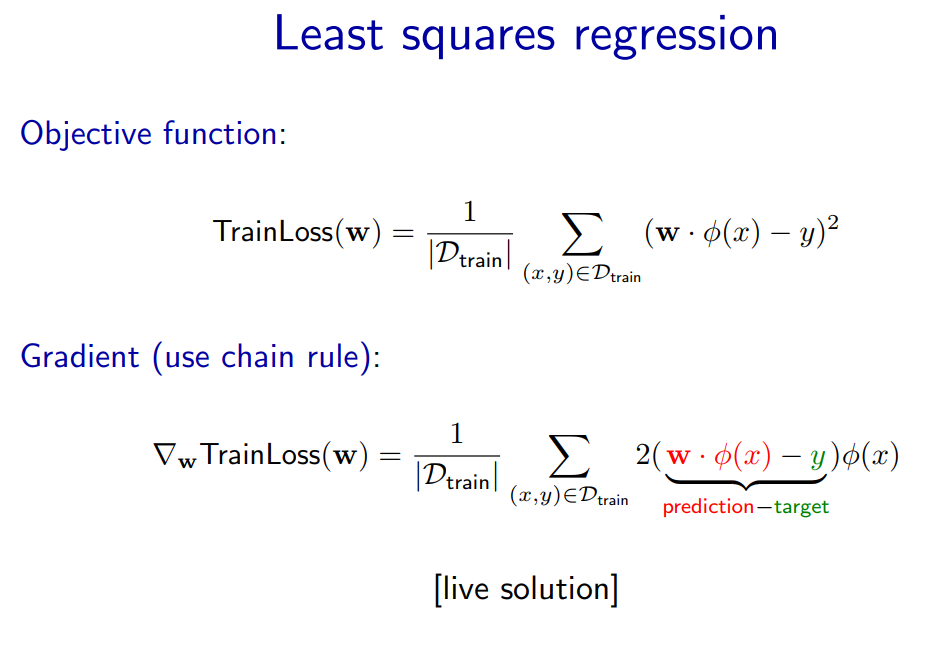
___

___
* loss function: J($\theta$)   
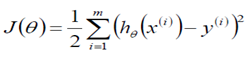  
 

___
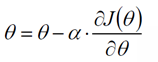  
 

* gradient:  

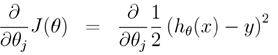  

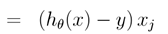  

In [101]:
# termination condition  
loop_max = 10000  # max loop
epsilon = 1e-3  # assume convergence
alpha = 0.001  # learning rate (step length)

In [103]:
def batch_gradient(input_data, target_data, alpha = 0.001, loop_max = 1000, epsilon = 1e-3):  
    
    # find training data length, features number
    m, feature_n = input_data.shape
    
    # insert bias value (intercept) to the first position of the training matrix
    input_data = np.c_[np.full(m, 1.0), input_data]

    

    # initialize weights  
    # +1 is because we add intercept to the position 0 
    np.random.seed(0)  
    theta = np.random.randn(feature_n+1)  

    diff = 0.  
    error = np.zeros(feature_n+1)  
    count = 0  # time of loop  
    finish = 0  # termination flag

    while count < loop_max:  
        count += 1  

        # batch gradient descent is to capture errors of the entire training set before update the weights 
        # stochastic gradient descent os just to capture the error of ONE record of the training set before update the weights
        # so for every step(loop) batch gradient descent calculates the error of the entire training set, need more computation


        # sum_m save errors of each feature (first one is intercept), e.g. [e0,e1,e2,e3,e4,...]
        # 
        # every loop initialize 0
        sum_m = np.zeros(feature_n+1)  

        # m is number of records of training data
        for i in range(m):  

            # derivative of loss function! 
            # calculate gradient
            # gradient = (h(theta) - y)* Xi
            dif = (np.dot(theta, input_data[i]) - target_data[i]) * input_data[i]  

            # add gradient of record i to sum_m of that loop batch
            sum_m = sum_m + dif  # if alpha is too large, sum_m will overflow while looping

        # update weight with learning rate * batch gradient 
        theta = theta - alpha * sum_m  # if alpha (learning rate) is big, will fluctuate rather than convergence 
        # theta = theta - 0.005 * sum_m      # e.g. alpha=0.05, will fluctuate  

        # check convergence 
        # np.linalg.norm (default) calculate L2-norm, here use to cal MSE
        mse = np.linalg.norm(theta - error)
        if mse < epsilon:  
            finish = 1  
            # break the loop
            break  
        else:
            # update error? with weights
            error = theta 
        if count%20==0 or count==1:
            print 'loop count = %d ' % count, '\t w:', str(map(lambda x: round(x, 4), theta)).ljust(20), '  MSE: ', round(mse,6)

    print 'Final:\nloop count = %d' % count, '\t w:',theta  , 'MSE: ', round(mse,6)
    
    return theta, mse

#### visualize with only 1 feature linear regression

In [104]:
theta, mse = batch_gradient(input_data, target_data)

loop count = 1  	 w: [2.3043, 3.688]        MSE:  4.348698
loop count = 20  	 w: [2.7314, 2.2892]       MSE:  0.029688
loop count = 40  	 w: [3.2463, 2.211]        MSE:  0.023029
loop count = 60  	 w: [3.646, 2.15]          MSE:  0.017875
loop count = 80  	 w: [3.9562, 2.1026]       MSE:  0.013875
loop count = 100  	 w: [4.197, 2.0658]        MSE:  0.01077
loop count = 120  	 w: [4.3839, 2.0373]       MSE:  0.008359
loop count = 140  	 w: [4.529, 2.0151]        MSE:  0.006488
loop count = 160  	 w: [4.6416, 1.9979]       MSE:  0.005036
loop count = 180  	 w: [4.729, 1.9846]        MSE:  0.003909
loop count = 200  	 w: [4.7968, 1.9742]       MSE:  0.003034
loop count = 220  	 w: [4.8495, 1.9662]       MSE:  0.002355
loop count = 240  	 w: [4.8904, 1.9599]       MSE:  0.001828
loop count = 260  	 w: [4.9221, 1.9551]       MSE:  0.001419
loop count = 280  	 w: [4.9467, 1.9513]       MSE:  0.001101
Final:
loop count = 288 	 w: [4.95496201 1.95007824] MSE:  0.000995


intercept = 5.0321389703765345 slope = 1.938293019888833


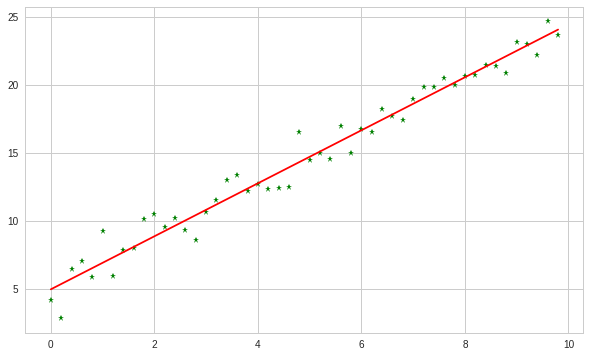

In [105]:
# check with scipy linear regression  
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, target_data)  
print 'intercept = %s slope = %s' % (intercept, slope)  
  
# print with our gradient weights    
plt.plot(x, target_data, 'g*')  
plt.plot(x, theta[1] * x + theta[0], 'r')  
plt.show()  

___
#### test with complex data
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

(506, 13) (506,)


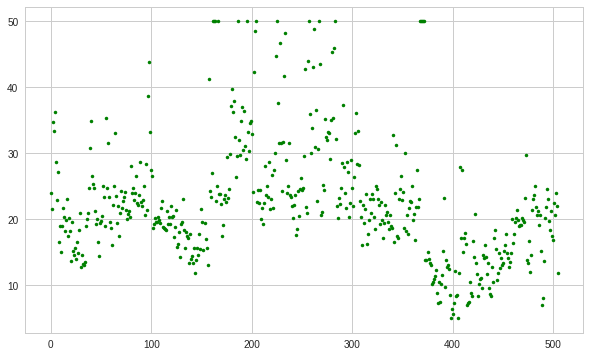

In [112]:
data = datasets.load_boston(return_X_y=True)
X, y = data
print X.shape, y.shape
plt.plot(y, 'g.')

In [18]:
# batch_gradient(X, y)

In [25]:
X.shape, y.shape

((506, 13), (506,))

In [75]:
# termination condition  
loop_max = 100  # max loop
epsilon = 1e-5  # assume convergence
alpha = 1e-10  # learning rate (step length)

In [76]:
input_data.shape

(506, 14)

* compare scikit-learn
___ 


In [230]:
from sklearn.linear_model import LinearRegression

In [231]:
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [232]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
lr.coef_, lr.intercept_

(array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
        -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
         3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
        -5.25466633e-01]), 36.49110328036191)

In [81]:
np.linalg.svd?

In [89]:
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [90]:
np.diag(arr, k=-1)

array([4, 8])

In [91]:
np.rot90(arr)

array([[3, 6, 9],
       [2, 5, 8],
       [1, 4, 7]])

In [92]:
arr.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

* compare scratch
___

In [190]:
from ori_regression import LinearRegression

In [120]:
o_lr = LinearRegression(gradient_descent=False)
o_lr

In [121]:
o_lr.fit(X,y,)

In [123]:
o_lr.w

array([-5.36267625, -0.85445837,  4.13205319, -2.6746504 ,  8.62654917,
       36.17152557, 13.42533588,  6.57977653, -2.60637625,  0.55472933,
       -2.35315109, -0.16728502,  0.82490454,  0.26932646])

In [126]:
from sklearn.metrics import mean_squared_error

In [128]:
mean_squared_error(y, o_lr.predict(X))

177297.31034239082

In [129]:
mean_squared_error(y, lr.predict(X))

21.8977792176875

In [ ]:
mean_squared_error(y, lr.predict(X))

In [130]:
o_lr.predict(X).shape

(506,)

* compare ours
___

In [177]:
etha, mse = batch_gradient(X, y, alpha=1e-9, epsilon=1e-3)

loop count = 1  	 w: [1.7639, 0.3995, 0.9764, 2.2388, 1.8675, -0.9774, 0.9489, -0.1642, -0.1039, 0.4088, 0.0662, 1.4508, 0.6911, 0.1193]   MSE:  4.169608
loop count = 20  	 w: [1.7628, 0.3978, 0.9584, 2.2292, 1.8675, -0.9779, 0.9424, -0.227, -0.1085, 0.4021, -0.2917, 1.4321, 0.2836, 0.1079]   MSE:  0.005914
loop count = 40  	 w: [1.7627, 0.3996, 0.9501, 2.2303, 1.8675, -0.9779, 0.9416, -0.2255, -0.1096, 0.4048, -0.2597, 1.4306, 0.2109, 0.1084]   MSE:  0.003448
loop count = 60  	 w: [1.7627, 0.4012, 0.9431, 2.2315, 1.8675, -0.9779, 0.9412, -0.222, -0.1105, 0.4072, -0.2225, 1.4298, 0.1633, 0.1092]   MSE:  0.002716
loop count = 80  	 w: [1.7626, 0.4023, 0.9369, 2.2324, 1.8675, -0.9779, 0.9409, -0.2188, -0.1111, 0.4092, -0.193, 1.4292, 0.1261, 0.1097]   MSE:  0.002142
loop count = 100  	 w: [1.7626, 0.4032, 0.9313, 2.2331, 1.8675, -0.9779, 0.9406, -0.2159, -0.1117, 0.4108, -0.1698, 1.4287, 0.0969, 0.1101]   MSE:  0.001691
loop count = 120  	 w: [1.7626, 0.4038, 0.9262, 2.2337, 1.8675, -0.9

* predict 

In [178]:
X.shape, etha.shape

((506, 13), (14,))

In [179]:
X_d = np.insert(X, 0 ,1, axis=1)
X_d.shape

(506, 14)

In [183]:
np.array_equal(X_d.dot(etha), np.dot(X_d, etha))

True

In [180]:
mean_squared_error(y, np.dot(X_d, etha))

555.8585250199194

___

#### simple data
* scikit-learn

In [185]:
lr.fit(input_data, target_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [186]:
lr.intercept_

5.032138970376536

In [187]:
lr.coef_

array([1.93829302])

* ori scratch

In [191]:
from ori_regression import LinearRegression

In [188]:
o_lr.fit(input_data, target_data)

In [189]:
o_lr.w

array([5.03213897, 1.93829302])

In [202]:
o_lr2=LinearRegression()
o_lr2

In [203]:
o_lr2.fit(input_data, target_data)

In [204]:
o_lr.w

array([5.03213897, 1.93829302])

* ours

In [210]:
th, _ = batch_gradient(input_data, target_data, epsilon=1e-6)

loop count = 1  	 w: [2.3043, 3.688]        MSE:  4.348698
loop count = 20  	 w: [2.7314, 2.2892]       MSE:  0.029688
loop count = 40  	 w: [3.2463, 2.211]        MSE:  0.023029
loop count = 60  	 w: [3.646, 2.15]          MSE:  0.017875
loop count = 80  	 w: [3.9562, 2.1026]       MSE:  0.013875
loop count = 100  	 w: [4.197, 2.0658]        MSE:  0.01077
loop count = 120  	 w: [4.3839, 2.0373]       MSE:  0.008359
loop count = 140  	 w: [4.529, 2.0151]        MSE:  0.006488
loop count = 160  	 w: [4.6416, 1.9979]       MSE:  0.005036
loop count = 180  	 w: [4.729, 1.9846]        MSE:  0.003909
loop count = 200  	 w: [4.7968, 1.9742]       MSE:  0.003034
loop count = 220  	 w: [4.8495, 1.9662]       MSE:  0.002355
loop count = 240  	 w: [4.8904, 1.9599]       MSE:  0.001828
loop count = 260  	 w: [4.9221, 1.9551]       MSE:  0.001419
loop count = 280  	 w: [4.9467, 1.9513]       MSE:  0.001101
loop count = 300  	 w: [4.9658, 1.9484]       MSE:  0.000855
loop count = 320  	 w: [4.9807,

In [211]:
th

array([5.03206148, 1.93830485])

### stochastic gredient descent
* the only diff from batch gradient is
    * update theta at every record of X instead of at every end of each loop (entire X)

In [213]:
def stochastic_gradient(input_data, target_data, alpha = 0.001, loop_max = 1000, epsilon = 1e-3):  
    
    # find training data length, features number
    m, feature_n = input_data.shape
    
    # insert bias value (intercept) to the first position of the training matrix
    input_data = np.c_[np.full(m, 1.0), input_data]

    

    # initialize weights  
    # +1 is because we add intercept to the position 0 
    np.random.seed(0)  
    theta = np.random.randn(feature_n+1)  

    diff = 0.  
    error = np.zeros(feature_n+1)  
    count = 0  # time of loop  
    finish = 0  # termination flag

    while count < loop_max:  
        count += 1  

        # loop through training set by record
        # m is number of records of training data
        for i in range(m):  

            # calculate difference (error) of i record 
            diff = np.dot(theta, input_data[i]) - target_data[i]
            
            # derivative(loss function)
            # = diff * Xi

            # update theta by every record i
            # gradient formula 
            # theta = theta - alpha * derivative(loss function) 
            # theta = theta - alpha * diff * Xi
            theta = theta - alpha * diff * input_data[i]

             

        # check convergence 
        # np.linalg.norm (default) calculate L2-norm, here use to cal MSE
        mse = np.linalg.norm(theta - error)
        if mse < epsilon:  
            finish = 1  
            # break the loop
            break  
        else:
            # update error? with weights
            error = theta 
        if count%20==0 or count==1:
            print 'loop count = %d ' % count, '\t w:', str(map(lambda x: round(x, 4), theta)).ljust(20), '  MSE: ', round(mse,6)

    print 'Final:\nloop count = %d' % count, '\t w:',theta  , 'MSE: ', round(mse,6)
    
    return theta, mse

In [221]:
stochastic_gradient(input_data, target_data, epsilon=1e-6)

loop count = 1  	 w: [2.0845, 1.9631]       MSE:  2.863348
loop count = 20  	 w: [2.7563, 2.2317]       MSE:  0.028807
loop count = 40  	 w: [3.2587, 2.1664]       MSE:  0.022444
loop count = 60  	 w: [3.6502, 2.1155]       MSE:  0.017486
loop count = 80  	 w: [3.9552, 2.0758]       MSE:  0.013623
loop count = 100  	 w: [4.1928, 2.0449]       MSE:  0.010614
loop count = 120  	 w: [4.3779, 2.0209]       MSE:  0.008269
loop count = 140  	 w: [4.5222, 2.0021]       MSE:  0.006443
loop count = 160  	 w: [4.6345, 1.9875]       MSE:  0.005019
loop count = 180  	 w: [4.7221, 1.9761]       MSE:  0.003911
loop count = 200  	 w: [4.7903, 1.9673]       MSE:  0.003047
loop count = 220  	 w: [4.8434, 1.9603]       MSE:  0.002374
loop count = 240  	 w: [4.8848, 1.955]        MSE:  0.001849
loop count = 260  	 w: [4.9171, 1.9508]       MSE:  0.001441
loop count = 280  	 w: [4.9422, 1.9475]       MSE:  0.001123
loop count = 300  	 w: [4.9618, 1.945]        MSE:  0.000875
loop count = 320  	 w: [4.9771

(array([5.03077503, 1.93599046]), 9.966597492231637e-07)

In [268]:
theta, mse = stochastic_gradient(X, y, alpha=1e-9)

loop count = 1  	 w: [1.7639, 0.3996, 0.9765, 2.239, 1.8675, -0.9774, 0.949, -0.1632, -0.1039, 0.409, 0.0731, 1.451, 0.6958, 0.1195]   MSE:  4.170737
loop count = 20  	 w: [1.7628, 0.398, 0.9584, 2.2295, 1.8675, -0.9779, 0.9424, -0.226, -0.1085, 0.4025, -0.2821, 1.4324, 0.2869, 0.1082]   MSE:  0.006484
loop count = 40  	 w: [1.7627, 0.3998, 0.9501, 2.2304, 1.8675, -0.9779, 0.9416, -0.2254, -0.1096, 0.405, -0.2559, 1.4306, 0.2107, 0.1085]   MSE:  0.003406
loop count = 60  	 w: [1.7627, 0.4013, 0.9431, 2.2315, 1.8675, -0.9779, 0.9412, -0.2221, -0.1105, 0.4074, -0.22, 1.4298, 0.1631, 0.1091]   MSE:  0.002681
loop count = 80  	 w: [1.7626, 0.4024, 0.937, 2.2324, 1.8675, -0.9779, 0.9408, -0.2189, -0.1112, 0.4094, -0.1911, 1.4292, 0.1262, 0.1097]   MSE:  0.002118
loop count = 100  	 w: [1.7626, 0.4033, 0.9314, 2.2331, 1.8675, -0.9779, 0.9406, -0.2161, -0.1118, 0.4109, -0.1684, 1.4287, 0.097, 0.1101]   MSE:  0.001674
loop count = 120  	 w: [1.7625, 0.4039, 0.9263, 2.2337, 1.8675, -0.9779, 0.9

In [225]:
mean_squared_error(y, np.dot(np.insert(X, 0 ,1, axis=1), theta))

559.1208306402087

#### MSE, mean_squared_error
___

In [227]:
np.linalg.norm(y-np.dot(np.insert(X, 0 ,1, axis=1), theta))

531.8976784156382

* scikit-learn's : mean squared erro

In [265]:
mean_squared_error(y, lr.predict(X))

21.8977792176875

* root squared error

In [263]:
np.linalg.norm(y - lr.predict(X))

105.26289129674272

* root mean squared error

In [266]:
np.linalg.norm(y - lr.predict(X))/(len(y))**0.5

4.679506300635516

In [238]:
y.shape, lr.predict(X).shape

((506,), (506,))

In [251]:
len(y)

506

* root mean squared error

In [260]:
def RMSE(y_t, y_p):
    one = reduce(lambda x,y: x+y, map(lambda x: abs(x[0]-x[1])**2, zip(y_t, y_p)))
    two = one/len(y_t)
    trd = two**0.5
    return trd

In [261]:
RMSE(y, lr.predict(X))

4.679506300635516

### Mini-batch gradient descent

In [294]:
X.shape

(506, 13)

In [295]:
np.zeros(13)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [484]:
def minibatch_gradient(input_data, target_data, alpha = 0.001, loop_max = 1000, epsilon = 1e-3, minibatch_size = 10): 
    
    # sample size of minibatch to update theta
    minibatch_size = minibatch_size
    # find training data length, features number
    m, feature_n = input_data.shape
    
    # insert bias value (intercept) to the first position of the training matrix
    input_data = np.c_[np.full(m, 1.0), input_data]


    # initialize weights  
    # +1 is because we add intercept to the position 0 
    np.random.seed(0)  
    theta = np.random.randn(feature_n+1)  

    diff = 0.  
    error = np.zeros(feature_n+1)  
    count = 0  # time of loop  
    finish = 0  # termination flag
    
    

    while count < loop_max:  
        count += 1  
        
        # update theta (weights) for every mini-batch

        # loop through training set by record
        # m is number of records of training data
        
        for i in range(1, m, minibatch_size):  
            
            # tmp batch weights, initial 0 for every mini-batch
            sum_m = np.zeros(feature_n+1)  
            
            for k in range(i-1, i+minibatch_size-1, 1):  
                
                if k>=feature_n:
                    continue
                # record level gradient of k
                dif = (np.dot(theta, input_data[k]) - target_data[k]) *input_data[k]  
                # add gradient to batch to tmp batch weights
                sum_m = sum_m + dif  # if alpha is big, sum_m will overflow  
            
            print sum_m
            # update theta for every mini-batch
            theta = theta - alpha * (1.0/minibatch_size) * sum_m # if alpha is large, will fluctuate rather than convergence
    


             

        # check convergence 
        # np.linalg.norm (default) calculate L2-norm, here use to cal MSE
        mse = np.linalg.norm(theta - error)
        if mse < epsilon:  
            finish = 1  
            # break the loop
            break  
        else:
            # update error? with weights
            error = theta 
        if count%1000==0 or count==1:
            print 'loop count = %d ' % count, '\t w:', str(map(lambda x: round(x, 4), theta)).ljust(20), '  MSE: ', round(mse,6)

    print 'Final:\nloop count = %d' % count, '\t w:',theta  , 'MSE: ', round(mse,6)
    
    return theta, mse

In [485]:
input_data.shape

(50, 1)

In [486]:
theta, _ = minibatch_gradient(input_data, target_data, alpha=1e-3, epsilon=1e-4, loop_max=100)
theta, _

50
[1.76405235 0.40015721]
[-2.72514252  0.        ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
loop count = 1  	 w: [1.7643, 0.4002]       MSE:  1.809135
[-2.72487  0.     ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.72459752  0.        ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.72432506  0.        ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.72405262  0.        ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.72378022  0.        ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.72350784  0.        ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.72323549  0.        ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.72296317  0.        ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.72269087  0.        ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.7224186  0.       ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.72214636  0.        ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.72187414  0.        ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.72160196  0.        ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.7213298  0.       ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[-2.72105766  0.        ]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 

(array([1.79116932, 0.40015721]), 0.0002698295375802573)

intercept = 4.40920121630168 slope = 2.1205580931508474


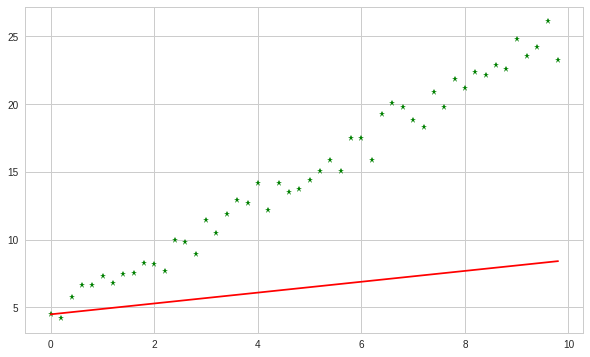

In [465]:
# check with scipy linear regression  
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, target_data)  
print 'intercept = %s slope = %s' % (intercept, slope)  
  
# print with our gradient weights    
plt.plot(x, target_data, 'g*')  
plt.plot(x, theta[1] * x + theta[0], 'r')  
plt.show()  

In [407]:
1e+1

10.0

In [469]:
theta, _ = minibatch_gradient(X, y, alpha=1e-5, loop_max=1e+4, epsilon=1e-4)

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502]
loop count = 1  	 w: [1.762, 0.4001, 0.972, 2.2329, 1.8676, -0.9783, 0.9363, -0.2993, -0.1143, 0.4058, -0.3576, 1.4175, -0.0549, 0.1059]   MSE:  4.115233
loop count = 1000  	 w: [1.7625, 0.3997, 1.0216, 2.1793, 1.8676, -0.9779, 0.9477, -0.1207, -0.1151, 0.3919, -0.3332, 1.4284, 0.1813, 0.0532]   MSE:  0.000104
Final:
loop count = 1149 	 w: [ 1.76248692  0.39959524  1.03100713  2.1718009   1.86755799 -0.97790014
  0.94863654 -0.11672265 -0.11570079  0.39045204 -0.33387094  1.42783759
  0.18132184  0.04507718] MSE:  0.0001


In [470]:
MSE(y, np.dot(np.insert(X, 0 ,1, axis=1), theta))

63.143907415803675

In [396]:
MSE(y, lr.predict(X))

4.679506300635516

In [397]:
mean_squared_error(y, np.dot(np.insert(X, 0 ,1, axis=1), theta))

3987.153043735587